<a href="https://colab.research.google.com/github/andres-sanabria-10/Analisis-de-datos/blob/main/PruebaDeTaller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de implementación de máquina de soporte vectorial con dataset MNIST
### https://www.kaggle.com/code/antoniocgg/mnist-on-scikit-learn-for-beginers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
digits = datasets.load_digits()
X, y = digits.images, digits.target

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
X.shape

(1797, 8, 8)

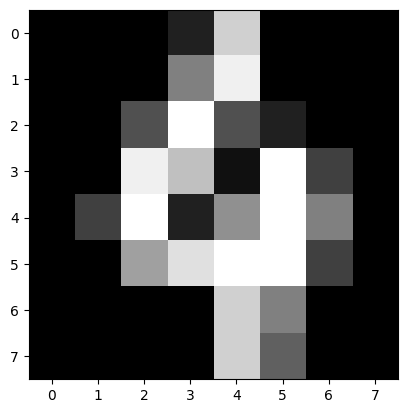

In [ ]:
plt.imshow(X[100],cmap='gray')

In [ ]:
print(y[100])

4


In [ ]:
X[1].reshape((1,-1))

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [ ]:
X = X.reshape((X.shape[0], -1))

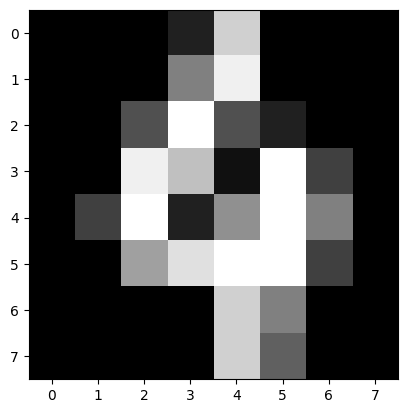

In [ ]:
plt.imshow(X[100].reshape((8,8)),cmap='gray')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0]

array([ 0.        , -0.34169755, -0.46336049,  0.50836462, -2.54590607,
       -1.03722581, -0.40623424, -0.13101874, -0.06103492, -0.61725402,
        0.30881425,  0.00348328, -2.18152552, -1.35608548, -0.52465505,
       -0.13336005, -0.04991522,  0.12851911,  1.08857992, -0.19343737,
       -1.16010978, -1.27307852, -0.552537  , -0.11409248, -0.03733267,
        0.86365151,  1.13744682, -1.16195968, -1.60835913, -1.28296188,
       -0.62554872, -0.04573894,  0.        ,  1.09151514,  1.34318585,
       -1.12678131, -0.90106555, -1.13185292, -0.81347241,  0.        ,
       -0.06519029,  0.82828946,  1.39981472, -0.82540858,  0.69177178,
        1.17865528, -0.33784246, -0.09403434, -0.03963009,  0.15955797,
        1.14244768,  0.64507954, -1.42282149,  0.68917912,  1.47990131,
       -0.21608405, -0.02638899, -0.30677646, -0.49962244, -0.246272  ,
        0.84804385,  1.05270303,  0.45952251, -0.19710003])

### parametros
###SVC(kernel='linear') crea un modelo SVM con kernel lineal.
### C=1.0 es un hiperparámetro que controla la penalización por errores.

In [ ]:
X_train.shape

(1437, 64)

In [ ]:
svm_model = SVC(kernel = 'rbf')
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
SVC?

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy:.4f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Precisión del modelo SVM: 0.9806

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



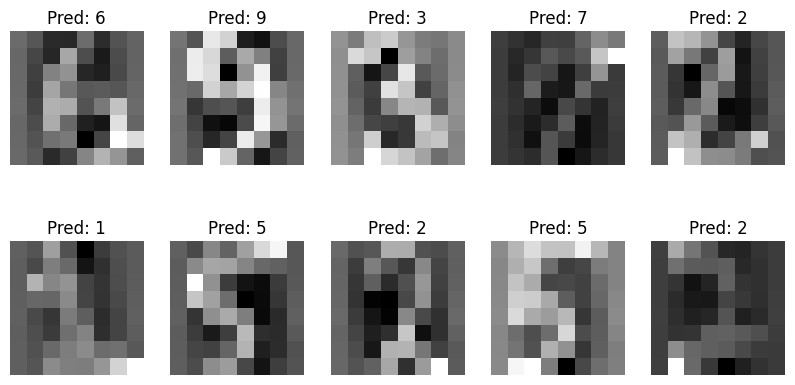

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()

In [ ]:
from PIL import Image

In [ ]:
test_image = Image.open('one.tif')

In [ ]:
test_image_np = np.asarray(test_image)

In [ ]:
test_image_np.shape

(8, 8)

In [ ]:
test_image_np = test_image_np.reshape((1, -1))
test_image_np = scaler.transform(test_image_np)

In [ ]:
result = svm_model.predict(test_image_np)

4


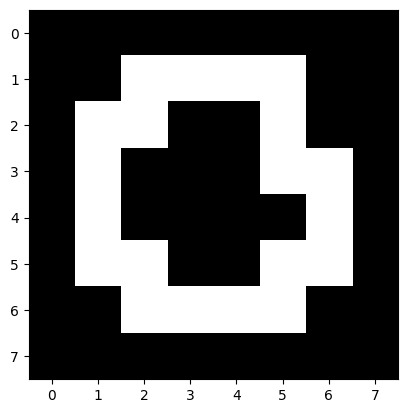

In [ ]:
print(result[0])
plt.imshow(test_image,cmap='gray')

In [ ]:
dataset2 = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [ ]:
dataset2.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [ ]:
print(dataset2['target_names'])

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [ ]:
print(dataset2['target_names'])

In [ ]:
print(dataset2['DESCR'])

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenCV li

In [ ]:
X,y = dataset2.data, dataset2.target

In [ ]:
X.shape

(1140, 1850)

4


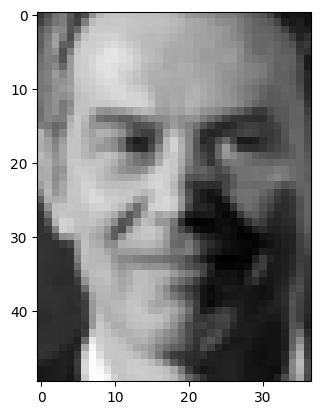

In [ ]:
print(y[150])
plt.imshow(X[150].reshape((50,37)),cmap='gray')